In [ ]:
import numpy as np

# def cross_entropy(y, y_pred):
#   return -1*(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))


def cross_entropy(y, y_pred):
  if y==1:
    return -np.log(y_pred)
  else:
    return -np.log(1-y_pred)

In [ ]:
cross_entropy(0, 0.999)

6.907755278982136

In [ ]:
# classification
# binary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])
model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['accuracy'])

# multiclass
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_hinge', optimizer='adam', metrics=['accuracy'])
# model.compile(loss=MyLossFunctionHere, optimizer='adam', metrics=['accuracy'])


In [ ]:
# regression
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
insurance = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/insurance.csv')

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_dummy = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'], drop_first=True)

insurance_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
X = insurance_dummy.drop(columns=['charges'])
y = insurance_dummy['charges']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
# (x - x.mean) / x.std
# scales to z-scores or standard scores
# mean of 0 and std/variance of 1

# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# scaler = MinMaxScaler()
# # (x - x.min()) / (x.max() - x.min())
# # scales range between 0 - 1

# # scaler.fit(X_train)
# # X_train_scaled = scaler.transform(X_train)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train_scaled.shape

(1070, 8)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=1000, batch_size=50)

Epoch 1/1000
22/22 [==============================] - 0s 8ms/step - loss: 322461280.0000 - mse: 322461280.0000 - mae: 13346.4375 - val_loss: 323430560.0000 - val_mse: 323430560.0000 - val_mae: 12968.5059
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 322451808.0000 - mse: 322451808.0000 - mae: 13346.1250 - val_loss: 323421312.0000 - val_mse: 323421312.0000 - val_mae: 12968.2021
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 322442720.0000 - mse: 322442688.0000 - mae: 13345.8232 - val_loss: 323412224.0000 - val_mse: 323412224.0000 - val_mae: 12967.8936
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 322433088.0000 - mse: 322433088.0000 - mae: 13345.4971 - val_loss: 323401824.0000 - val_mse: 323401824.0000 - val_mae: 12967.5449
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 322422272.0000 - mse: 322422272.0000 - mae: 13345.1328 - val_loss: 323389600.0000 - val_mse: 323389600.0000 - 

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=50)

Epoch 1/100
22/22 [==============================] - 0s 6ms/step - loss: 13346.1885 - mse: 322455104.0000 - mae: 13346.1885 - val_loss: 12968.3408 - val_mse: 323427520.0000 - val_mae: 12968.3408
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 13346.0342 - mse: 322450720.0000 - mae: 13346.0342 - val_loss: 12968.1865 - val_mse: 323423008.0000 - val_mae: 12968.1865
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 13345.8916 - mse: 322446560.0000 - mae: 13345.8916 - val_loss: 12968.0332 - val_mse: 323418624.0000 - val_mae: 12968.0332
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 13345.7344 - mse: 322442176.0000 - mae: 13345.7344 - val_loss: 12967.8564 - val_mse: 323413792.0000 - val_mae: 12967.8564
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 13345.5420 - mse: 322436864.0000 - mae: 13345.5420 - val_loss: 12967.6299 - val_mse: 323407744.0000 - val_mae: 12967.6299
Epoch 6/100
22/22 [======

In [ ]:
def build_model(loss='mae', optimizer='adam'):
  model = Sequential()
  model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss=loss, optimizer=optimizer, metrics=['mse', 'mae'])

  return model

In [ ]:
model = build_model(loss='mse')
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=50)

Epoch 1/500
22/22 [==============================] - 0s 7ms/step - loss: 322435936.0000 - mse: 322435936.0000 - mae: 13345.4658 - val_loss: 323407648.0000 - val_mse: 323407648.0000 - val_mae: 12967.5771
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 322427776.0000 - mse: 322427776.0000 - mae: 13345.1523 - val_loss: 323399104.0000 - val_mse: 323399104.0000 - val_mae: 12967.2402
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 322417952.0000 - mse: 322417984.0000 - mae: 13344.7832 - val_loss: 323388672.0000 - val_mse: 323388672.0000 - val_mae: 12966.8320
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 322405792.0000 - mse: 322405792.0000 - mae: 13344.3291 - val_loss: 323375424.0000 - val_mse: 323375424.0000 - val_mae: 12966.3438
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 322390080.0000 - mse: 322390080.0000 - mae: 13343.7803 - val_loss: 323358400.0000 - val_mse: 323358400.0000 - val_m

In [ ]:
df = pd.DataFrame(history.history)

In [ ]:
df.head()

,loss,mse,mae,val_loss,val_mse,val_mae
0,322435936.0,322435936.0,13345.465820,323407648.0,323407648.0,12967.577148
1,322427776.0,322427776.0,13345.152344,323399104.0,323399104.0,12967.240234
2,322417952.0,322417984.0,13344.783203,323388672.0,323388672.0,12966.832031
3,322405792.0,322405792.0,13344.329102,323375424.0,323375424.0,12966.343750
4,322390080.0,322390080.0,13343.780273,323358400.0,323358400.0,12965.750000


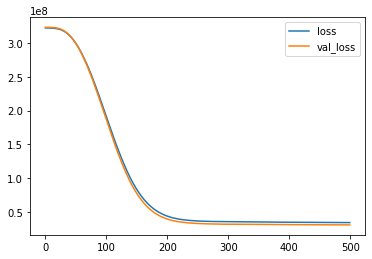

In [ ]:
df[['loss', 'val_loss']].plot()